## Montecarlo Martingale Strategy

In [9]:
import random
random.seed(1234)
def rollDice():
    roll = random.randint(1,100)
    if roll == 100:
        #print('You lose')
        return False
    elif roll <=50:
        #print('Rolla 1-50, you lose')
        return False
    elif 100>roll>50:
        #print('You Win')
        return True

In [42]:
def double_bettor(funds,initial_wager,wager_counts):
    value = funds
    wager = initial_wager
    wX=[]
    vY=[]
    broke_count = 0
    currentWager = 1
    previousWager='win'
    previousWagerAmount=initial_wager
    while currentWager<wager_counts:
        if previousWager=='win':
            if rollDice():
                value += wager
            else:
                value -= wager
                previousWager='loss'
                previousWagerAmount = wager
            wX.append(currentWager)
            vY.append(value)
            if value<0:
                broke_count +=1
                break
        elif previousWager=='loss':
            if rollDice():
                wager=previousWagerAmount*2
                value += wager
                wager=initial_wager
                previousWager='win'
            else:
                wager=previousWagerAmount*2
                value -= wager  
                previousWager='loss'
                previousWagerAmount = wager
            wX.append(currentWager)
            vY.append(value)
            if value<0:
                broke_count +=1
                break
        currentWager += 1
    return wX,vY,broke_count    

In [43]:
wX,vY,broke_count=double_bettor(10000,100,10000)

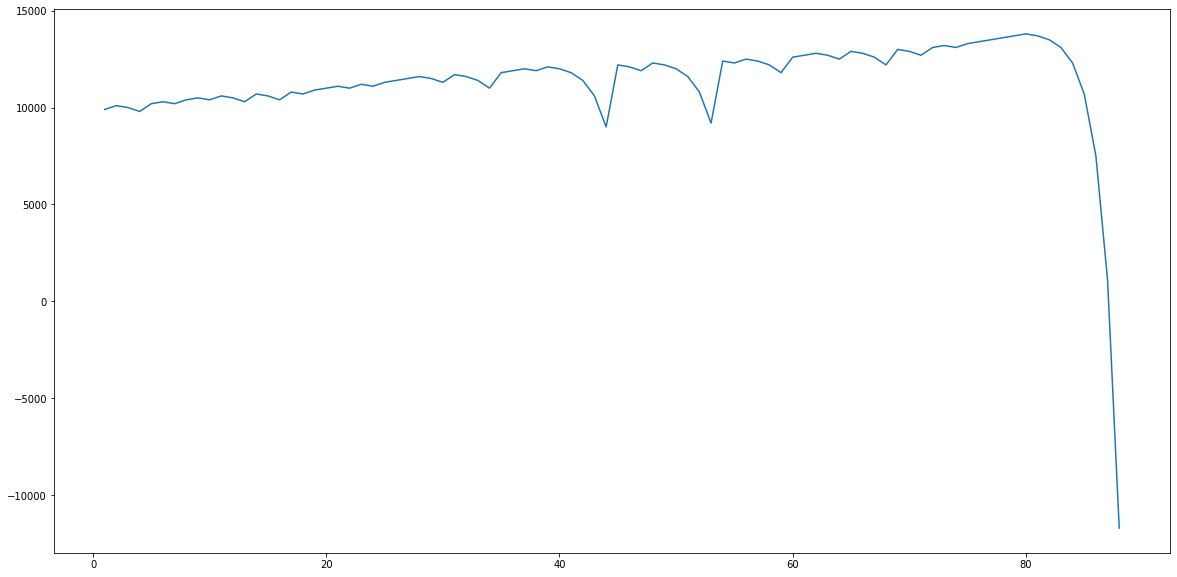

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(wX,vY)

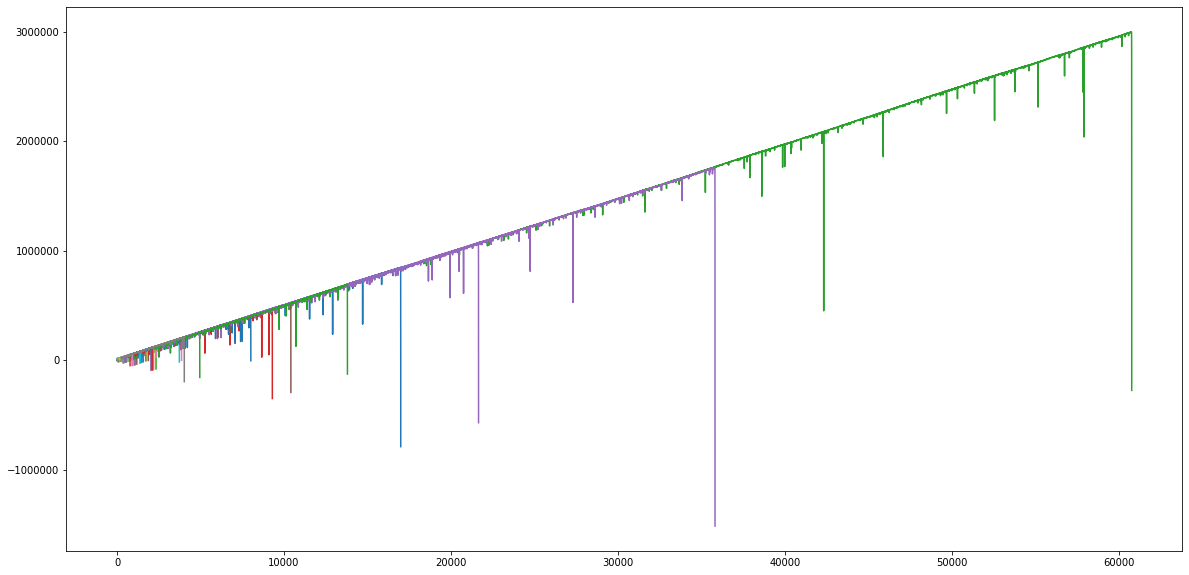

In [45]:
counter = 0 
plt.figure(figsize=(20,10))
while counter<100:
    wX,vY,broke_count=double_bettor(10000,100,100000)
    plt.plot(wX,vY)
    counter+=1

Death rate 79.29
Survive 20.709999999999994


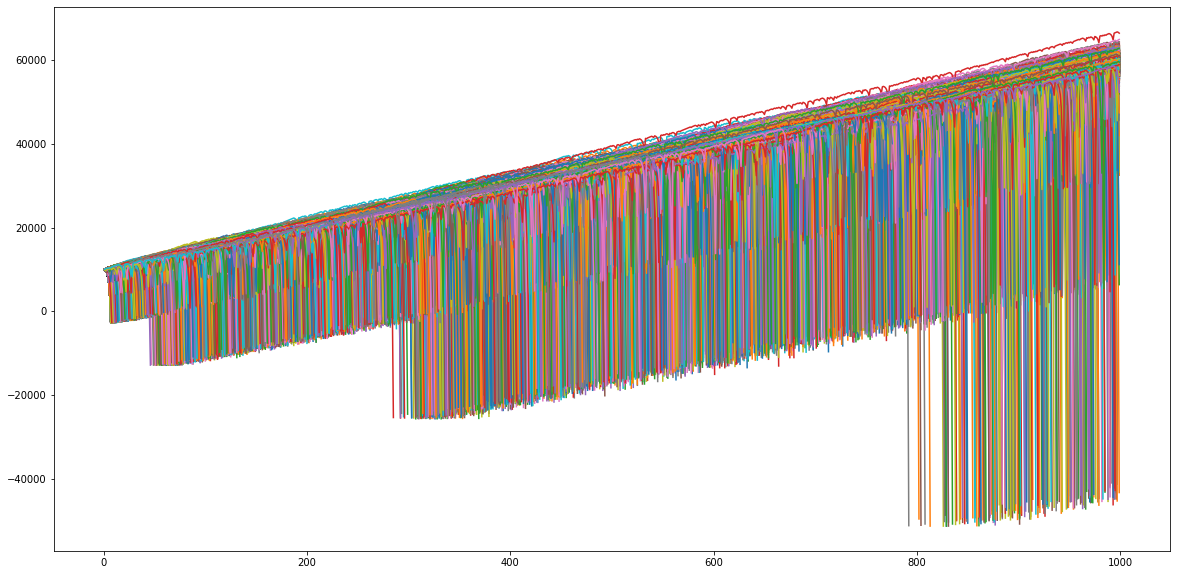

In [55]:
counter = 0 
total_broke_count = 0
plt.figure(figsize=(20,10))
while counter<10000:
    wX,vY,broke_count=double_bettor(10000,100,1000)
    plt.plot(wX,vY)
    counter += 1
    total_broke_count+=broke_count
print('Death rate',total_broke_count/float(counter)*100)
print('Survive',100-total_broke_count/float(counter)*100)
    

Death rate 28.48
Survive 71.52


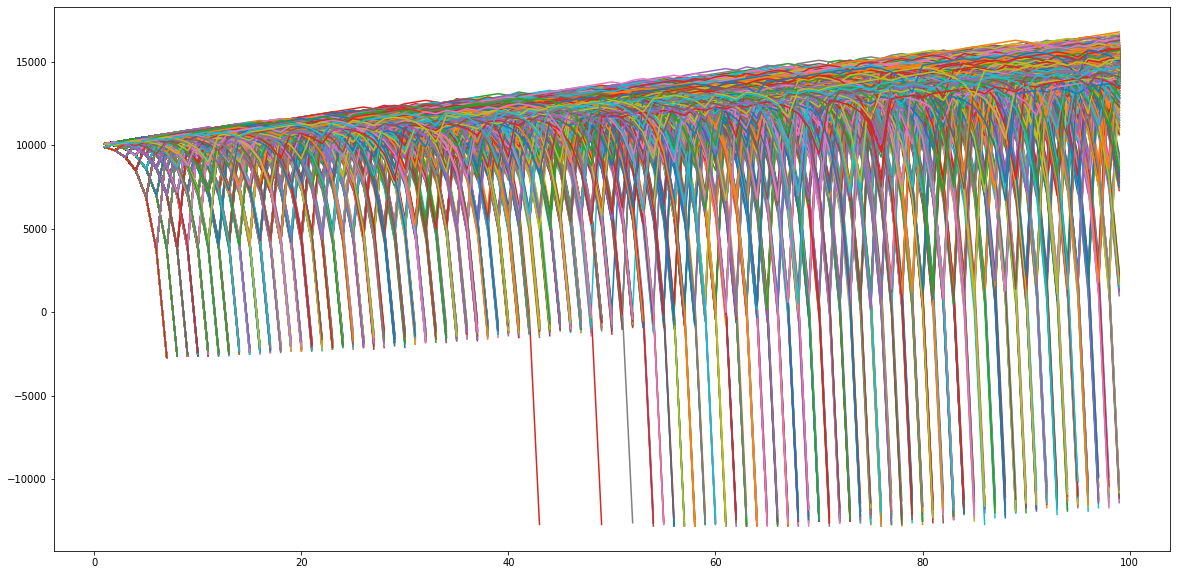

In [56]:
counter = 0 
total_broke_count = 0
plt.figure(figsize=(20,10))
while counter<10000:
    wX,vY,broke_count=double_bettor(10000,100,100)
    plt.plot(wX,vY)
    counter += 1
    total_broke_count+=broke_count
print('Death rate',total_broke_count/float(counter)*100)
print('Survive',100-total_broke_count/float(counter)*100)